# generate / update a DataDiVR backend project 

In [1]:
# functions to mimick uploading process (generate folders, files on the backend)

# PROCESS STEPS 
# do something with a Graph 
# generate JSON files per layout for the Graph (temporary solution?)
# use those JSON to generate folders, files like textures, nodes.json, links.json etc.. 

In [2]:
# some functions : 

import networkx as nx
import random
import json

def generate_random_rgba():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    alpha = random.randint(0, 255)  # Random alpha value between 0 and 1
    
    rgba_color = (red, green, blue, alpha)
    return rgba_color


def rgba_to_hex8(rgba_color):
    # Convert values to hexadecimal and format them
    hex_red = format(rgba_color[0], '02X')
    hex_green = format(rgba_color[1], '02X')
    hex_blue = format(rgba_color[2], '02X')
    hex_alpha = format(rgba_color[3], '02X')
    
    # Combine values into an 8-character hexadecimal color code
    color_hex = f"#{hex_red}{hex_green}{hex_blue}{hex_alpha}"
    
    return color_hex


Number of nodes:  34
Number of Links:  78


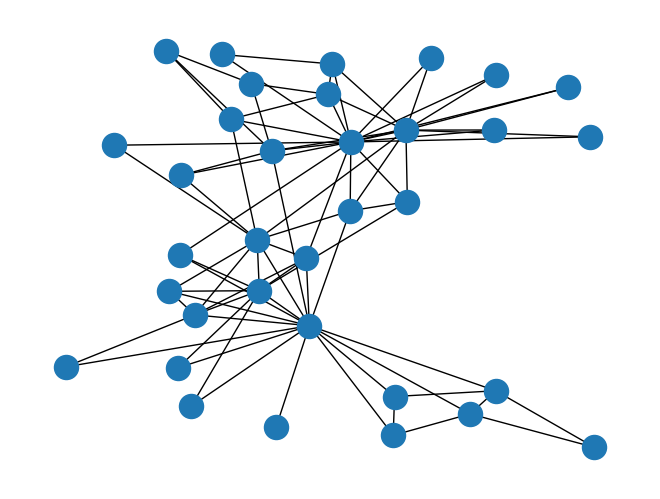

In [3]:
# generate a graph 

G = nx.karate_club_graph()
print("Number of nodes: ", len(G.nodes()))
print("Number of Links: ", len(G.edges()))

nx.draw(G)

In [4]:
# generate graph layouts i.e. node positions 
posG3D_1_pre = nx.spring_layout(G, dim=3, k=0.1, iterations=100)
posG3D_1 = {key: value.tolist() for key, value in posG3D_1_pre.items()}

posG3D_2_pre = nx.spring_layout(G, dim=3, k=0.1, iterations=200)
posG3D_2= {key: value.tolist() for key, value in posG3D_2_pre.items()}

posG3D_3_pre =nx.spring_layout(G, dim=3, k=0.1, iterations=500)
posG3D_3 = {key: value.tolist() for key, value in posG3D_3_pre.items()}

In [5]:
# hex color values 
d_nodecolors_hex = dict(zip(G.nodes(),['#FF2300']*len(G.nodes())))
l_linkcolors_hex = '#ff0000'

# rgba color values
d_nodecolors_rgba = dict(zip(G.nodes(),[(255,35,0,120)]*len(G.nodes())))
l_linkcolors_rgba = (0,255,0,100)

# hex8 color values
d_nodecolors_hex8 = dict(zip(G.nodes(),['#0000ffaa']*len(G.nodes())))
l_linkcolors_hex8 = '#0080ffaa'

### JSON 

In [6]:
import json

In [7]:
# ===============================================
# NODE ANNOTATION - a list of strings
# ===============================================

# new annotation format: 
""" 
	"nodes": [
		{
			"pos": [
				20.157665194728846,
				19.08545649237665,
				10.958288870722058
			],
			"cluster": "cluster: 0",
			"nodecolor": "#1f77b4",
			"annotation": {
				"Movies": [
					"The Dark Knight",
					"The Dark Knight Rises"
				],
				"Genres": [
					"Drama",
					"Thriller",
					"Action",
					"Crime"
				]
			},
			"id": 0,
			"name": "Aaron Eckhart"
		}, """

# --------------------------------------------------------------------
#
# TO DO : INCORPORATE NEW ANNOTATIONS FORMAT INTO THE GRAPH
#
# --------------------------------------------------------------------

l_annotations_json = []
for g in G.nodes():
    sublist = ["Node: "+str(g)]
    l_annotations_json.append(sublist)
        
d_annotations = dict(zip(G.nodes(), l_annotations_json))
nx.set_node_attributes(G, d_annotations, name="annotation")





# ===============================================
# GRAPH NAME AND DESCRIPTION - a string each
# ===============================================

G.graph['graphtitle']  = "Zachary Karateclub Graph"
G.graph['graphdesc'] = "A toy graph for testing purposes. Number of nodes: "+str(len(G.nodes()))+", Links: "+ str(len(G.edges()))+"."

# ===============================================
# NODE COLORS - a dict with keys = node id as in G.nodes and values = color as hex or rgba
# LINK COLORS - a list of hex or rgba colors per edge as in G.edges or one color for all edges
# ===============================================
#                     a n d 
# ===============================================
# NODE POSITIONS - a dict with keys = G.nodes and values = coordinates (x,y) or (x,y,z)
# ===============================================

# first Layout - rgba
G_rgba = G.copy()
G_rgba.name = '01-graph-rgbacolors'
nx.set_node_attributes(G_rgba, d_nodecolors_rgba, name="nodecolor")
nx.set_edge_attributes(G_rgba, l_linkcolors_rgba, name="linkcolor")
nx.set_node_attributes(G_rgba, posG3D_1, name="pos")

# second Layout - hex
G_hex = G.copy()
G_hex.name = '02-graph-hexcolors'
nx.set_node_attributes(G_hex, d_nodecolors_hex, name="nodecolor")
nx.set_edge_attributes(G_hex, l_linkcolors_hex, name="linkcolor")
nx.set_node_attributes(G_hex, posG3D_2, name="pos")

# third Layout - hex8
G_hex8 = G.copy()
G_hex8.name = '03-graph-hex8colors'
nx.set_node_attributes(G_hex8, d_nodecolors_hex8, name="nodecolor")
nx.set_edge_attributes(G_hex8, l_linkcolors_hex8, name="linkcolor")
nx.set_node_attributes(G_hex8, posG3D_3, name="pos")


# fourth layout - cluster key next level communities
# artifical groups of graph for cluster colors 
G_clusters = G.copy()
G_clusters.name = '04-graph-clustershex8colors'


clustername_1 = 'group 1'
clustername_2 = 'group 2'
clustername_3 = 'group 3'

# nodes into groups
for g in G_clusters.nodes():
    if g < len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_1
    elif g < 2 * len(G_clusters.nodes()) / 3:
        G_clusters.nodes[g]['cluster'] = clustername_2
    else:
        G_clusters.nodes[g]['cluster'] = clustername_3

# node colors 
d_nodecolors_clusters = {}
nodes_group1 = []
nodes_group2 = []
nodes_group3 = []
for n in G_clusters.nodes(): 
    if G_clusters.nodes[n]['cluster'] == clustername_1:
        d_nodecolors_clusters[n] = '#0000ffaa'
        nodes_group1.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_2:
        d_nodecolors_clusters[n] = '#00ff00aa'
        nodes_group2.append(n)
    elif G_clusters.nodes[n]['cluster'] == clustername_3:
        d_nodecolors_clusters[n] = '#ff0000aa'
        nodes_group3.append(n)

# link colors
d_linkcolors_clusters = {}
for edge in G_clusters.edges():
    if edge[0] in nodes_group1 and edge[1] in nodes_group1:
        d_linkcolors_clusters[edge] = '#0000ffaa'
       
    elif edge[0] in nodes_group2 and edge[1] in nodes_group2:
        d_linkcolors_clusters[edge] = '#00ff00aa'
       
    elif edge[0] in nodes_group3 and edge[1] in nodes_group3:
        d_linkcolors_clusters[edge] = '#ff0000aa'
       
    else:
        d_linkcolors_clusters[edge] = '#B1B1B150'

l_linkcolors_clusters = list(d_linkcolors_clusters.values())

nx.set_node_attributes(G_clusters, d_nodecolors_clusters, name="nodecolor")
nx.set_node_attributes(G_clusters, posG3D_2, name="pos") # reuse the second layout
nx.set_edge_attributes(G_clusters, {edge: color for edge, color in zip(G_clusters.edges(), l_linkcolors_clusters)}, "linkcolor")


+ the above cells are unfinished and the graph json creation process should be adapted to the new json format

# process a pre-defined json file: 

In [1]:
import json 
temp_folder = "temp_upload_data/"
file = "01-spring-layout.json"

with open (temp_folder+file, "r") as f:
    data = json.load(f)



#data
    

# ===============================================
# import pickle
# path = "PPI_diseasegene_only/"
# file = path + "d_pos_spring.pkl"
# with open (file, "rb") as f:
#     data = pickle.load(f)

# how to upload: (for slides for friday SCP4 talk)
+ make json or dict? 
+ pull backend from github
+ open a notebook where you process the data you want to explore in the VR and save it as a json file
+ locate the notebook in the "DataDiVR_webapp" folder called "_GenerateProject.ipynb"
+ in this notebook : from DataDiVR_webapp import "the upload functions"
+ in this notebook : call the uploading function (as in cells below) and fill in your data object 
+ it automatically generates a folder with all files, subfolders in your backend path

In [2]:
# create folders and files instead of manually uploading files 
# DISCLAIMER: paths are temporary and need generalization / fix

from uploaderGraph import *
from uploader import *
# if you have a json  - take care of how to avoid making the json??? 
upload_filesJSON(data) # , path)

# -------------------------------
#
# TO DO : INCORPORATE CSV uploading process 
#
# -------------------------------
# if you generated CSV files 
#upload_filesCSV(data) # , path)

C_DEBUG: is dict
Successfully created the directory static/projects/01-spring-layout 
C_DEBUG IN uploaderGraph - all_dicts:  [{'data': [['0', '1'], ['0', '2'], ['0', '3'], ['0', '4'], ['0', '5'], ['0', '6'], ['0', '7'], ['0', '8'], ['0', '10'], ['0', '11'], ['0', '12'], ['0', '13'], ['0', '17'], ['0', '19'], ['0', '21'], ['0', '31'], ['1', '2'], ['1', '3'], ['1', '7'], ['1', '13'], ['1', '17'], ['1', '19'], ['1', '21'], ['1', '30'], ['2', '3'], ['2', '7'], ['2', '8'], ['2', '9'], ['2', '13'], ['2', '27'], ['2', '28'], ['2', '32'], ['3', '7'], ['3', '12'], ['3', '13'], ['4', '6'], ['4', '10'], ['5', '6'], ['5', '10'], ['5', '16'], ['6', '16'], ['8', '30'], ['8', '32'], ['8', '33'], ['9', '33'], ['13', '33'], ['14', '32'], ['14', '33'], ['15', '32'], ['15', '33'], ['18', '32'], ['18', '33'], ['19', '33'], ['20', '32'], ['20', '33'], ['22', '32'], ['22', '33'], ['23', '25'], ['23', '27'], ['23', '29'], ['23', '32'], ['23', '33'], ['24', '25'], ['24', '27'], ['24', '31'], ['25', '31'], ['2

'<a style="color:green;">SUCCESS </a>01-spring-layout Node Textures Created<br><a style="color:green;">SUCCESS </a>01-spring-layout Node Textures Created<br><a style="color:green;">SUCCESS </a>01-spring-layout_links Link Textures Created<br><a style="color:green;">SUCCESS </a>01-spring-layout_links Link Textures Created<br>'